**1.Problem Statement**

To build a classification methodology to predict whether a website is a phising website on the basis of given set of predictors. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read Data
train=pd.read_csv('/home/stellapps/Downloads/Phising-Classifier-master/Training_Batch_Files/phising_08012020_120000.csv')
test=pd.read_csv('/home/stellapps/Downloads/Phising-Classifier-master/Prediction_Batch_files/phising_08012020_120000.csv')

In [3]:
train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 30 columns):
having_IP_Address              3302 non-null int64
URL_Length                     3302 non-null int64
Shortining_Service             3302 non-null int64
having_At_Symbol               3302 non-null int64
double_slash_redirecting       3302 non-null int64
Prefix_Suffix                  3302 non-null int64
having_Sub_Domain              3302 non-null int64
SSLfinal_State                 3302 non-null int64
Domain_registeration_length    3302 non-null int64
Favicon                        3302 non-null int64
port                           3302 non-null int64
HTTPS_token                    3302 non-null int64
Request_URL                    3302 non-null int64
URL_of_Anchor                  3302 non-null int64
Links_in_tags                  3302 non-null int64
SFH                            3302 non-null int64
Submitting_to_email            3302 non-null int64
Abnormal_URL              

In [6]:
#Lets see our target Variable
train['Result'].describe()

count    11055.000000
mean         0.113885
std          0.993539
min         -1.000000
25%         -1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Result, dtype: float64

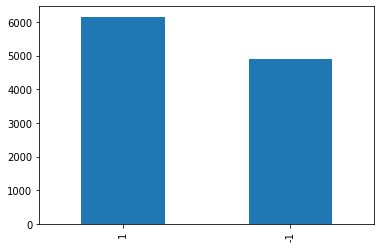

In [7]:
train['Result'].value_counts().plot(kind='bar')

In [8]:
train['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

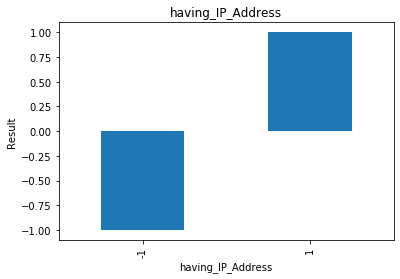

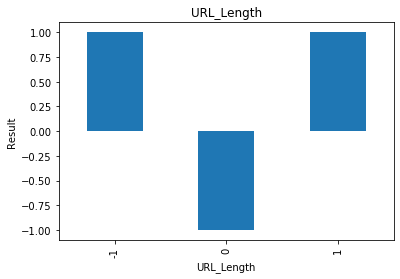

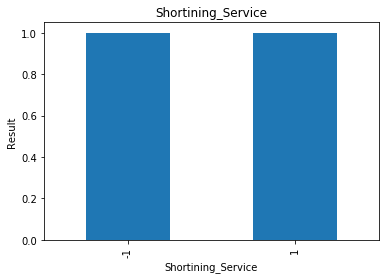

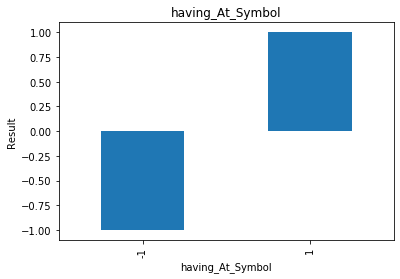

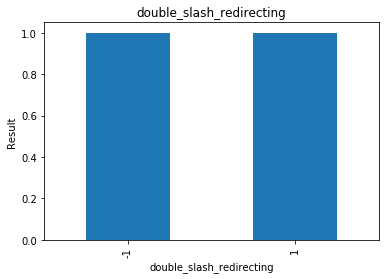

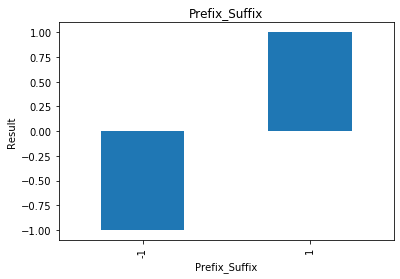

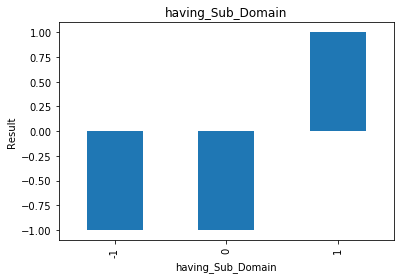

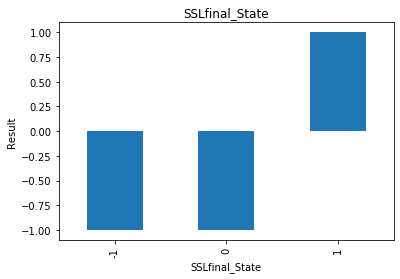

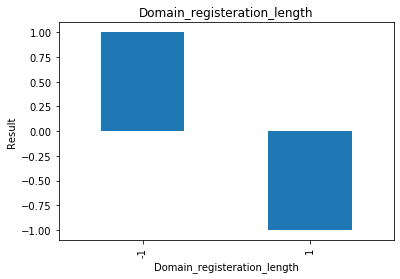

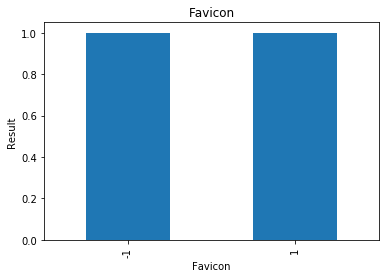

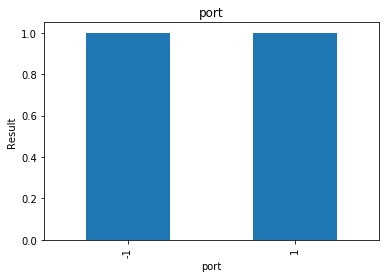

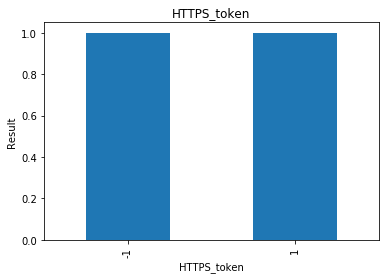

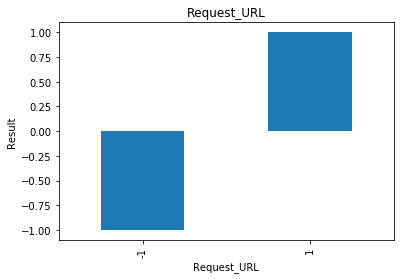

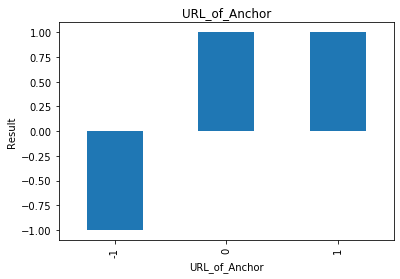

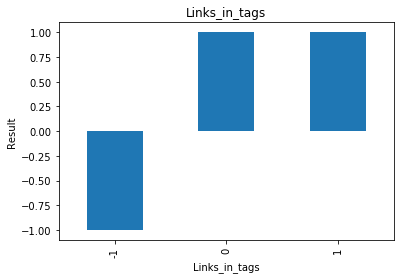

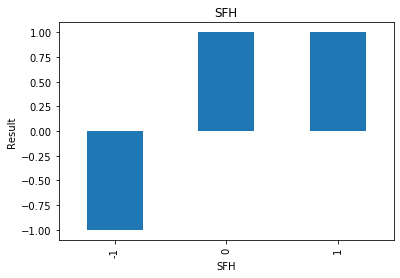

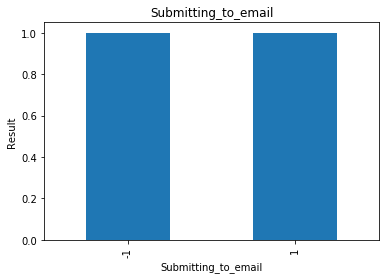

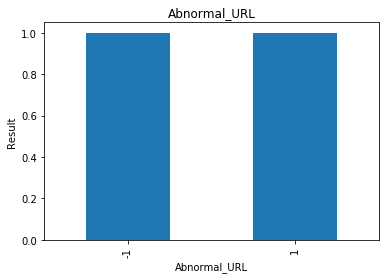

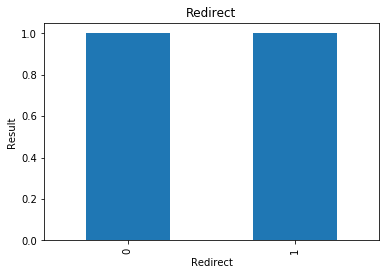

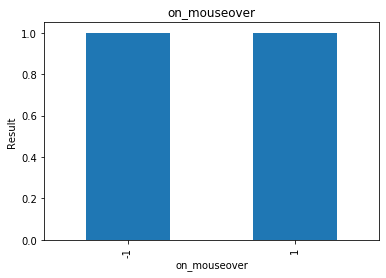

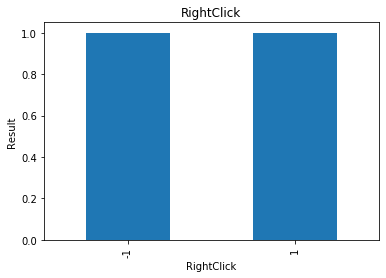

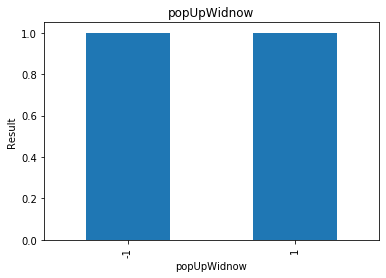

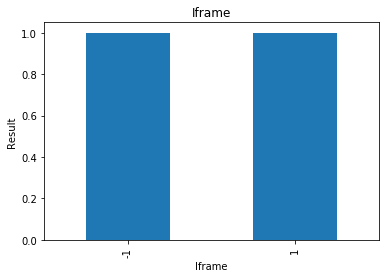

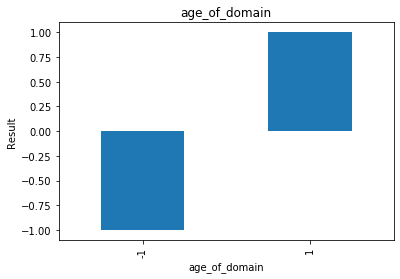

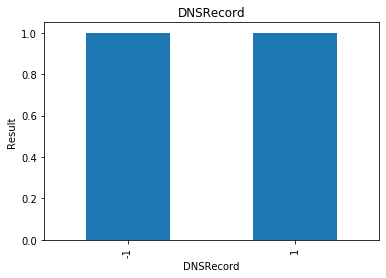

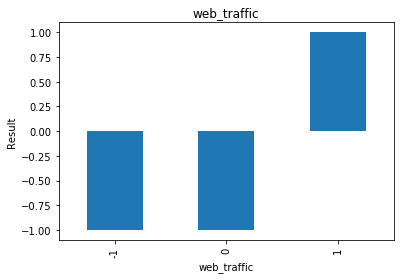

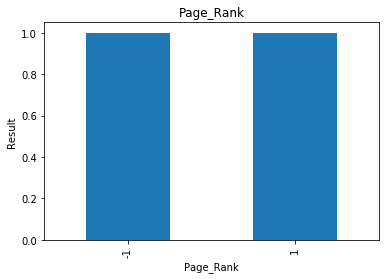

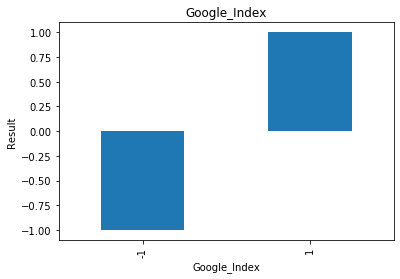

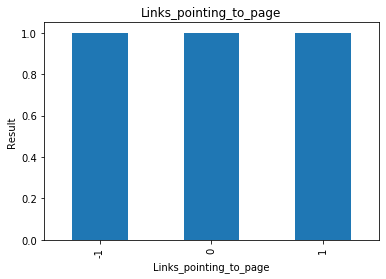

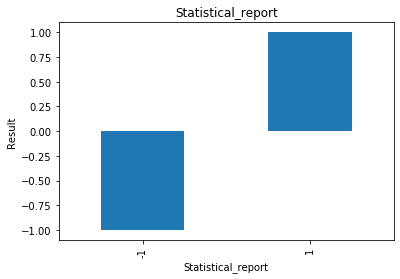

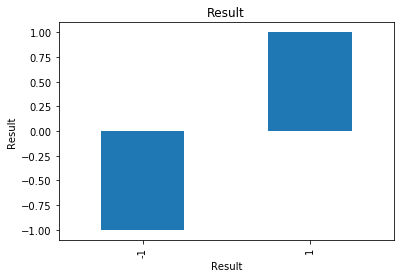

In [9]:
import matplotlib.pyplot as plt
for feature in train:
    data=train.copy()
    train.groupby(feature)['Result'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Result')
    plt.title(feature)
    plt.show()

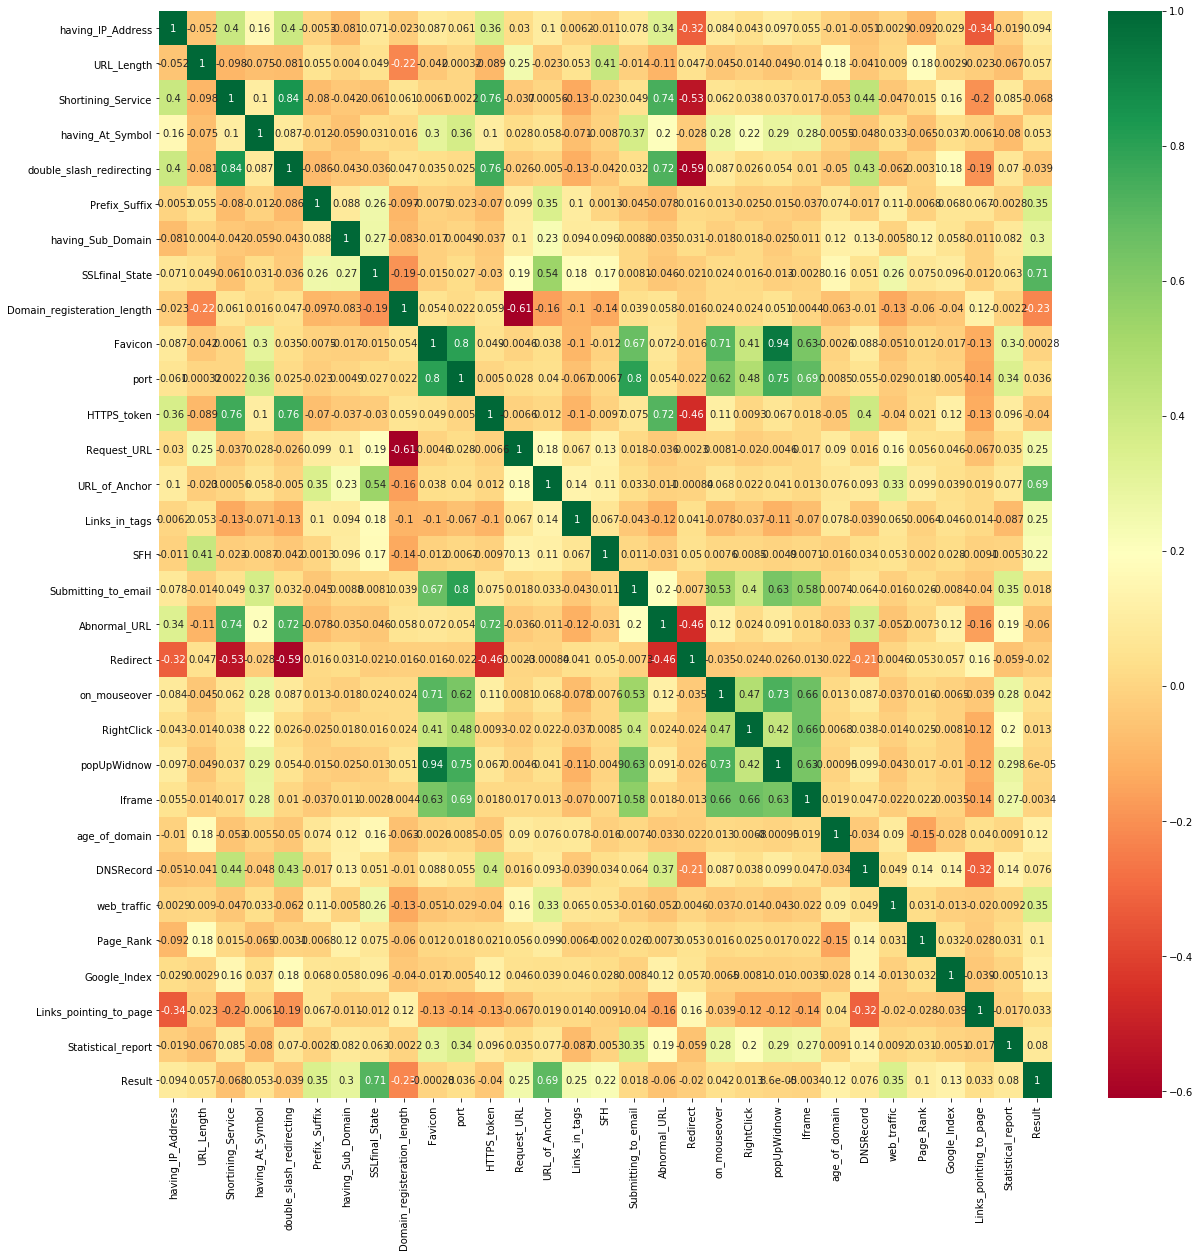

In [10]:
# Generate correlation matrix


import seaborn as sns
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")  # Generate heatmap (though very less clarity due to large no. of ftrs

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [11]:
print(train.corr()['Result'].sort_values())      # Print correlation with target variable

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [12]:
# Remove features having correlation coeff. between +/- 0.03
train.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(train.columns))

25


In [13]:
# Remove features having correlation coeff. between +/- 0.03
test.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(test.columns))

24


In [14]:
print(train.shape)
print(test.shape)

(11055, 25)
(3302, 24)


In [15]:
y=train['Result']
X=train.drop(['Result'],axis=1)

In [16]:
X.head(3)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,1,-1,1,0,-1


In [17]:
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Split the data as training and testing data - 70% train size, 30% test size


In [19]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X,y)

Y_prediction = random_forest.predict(test)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(round(acc_random_forest,2,), "%")


98.87 %


In [20]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X,y)

Y_pred = logreg.predict(test)

acc_log = round(logreg.score(X, y) * 100, 2)
print(round(acc_log,2,), "%")


92.69 %


In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X,y)

Y_pred = knn.predict(test)

acc_knn = round(knn.score(X, y) * 100, 2)
print(round(acc_log,2,), "%")


92.69 %


In [22]:
gaussian = GaussianNB()
gaussian.fit(X,y)

Y_pred = gaussian.predict(test)

acc_log = round(gaussian.score(X, y) * 100, 2)
print(round(acc_log,2,), "%")


60.48 %


In [23]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,y)

Y_pred = decision_tree.predict(test)

acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
print(round(acc_decision_tree,2,), "%")


98.87 %


In [24]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, 
               acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.87,Random Forest
98.87,Decision Tree
97.47,KNN
60.48,Logistic Regression


We Havebuilt our model with diffrent models but we can see decision tree and Random Forest Performed Well

**1.KFOLD VALIDATION**

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

cross-v.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [25]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X,y, cv=10, scoring = "accuracy")

In [26]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98282098 0.98282098 0.97197107 0.98372514 0.98372514 0.97285068
 0.96289593 0.95475113 0.96470588 0.95927602]
Mean: 0.9719542929148289
Standard Deviation: 0.010513609044184007




This looks much more realistic than before. Our model has a average accuracy of 97% with a standard deviation of 1 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + - 11%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it's performance even further in the following section.



**2.Random Forest**

What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Below you can see how a random forest would look like with two trees:

In [27]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
SSLfinal_State,0.304
URL_of_Anchor,0.260
web_traffic,0.077
having_Sub_Domain,0.065
Prefix_Suffix,0.047
Links_in_tags,0.045
SFH,0.022
Request_URL,0.020
Links_pointing_to_page,0.020


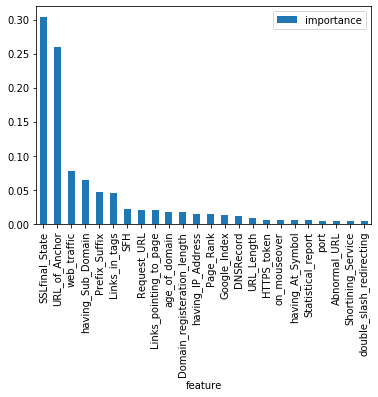

In [28]:
importances.plot.bar()

In [29]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X,y)
Y_prediction = random_forest.predict(test)

random_forest.score(X, y)

acc_random_forest = round(random_forest.score(X,y) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.86 %




Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.


In [30]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 97.23 %


# HYPER Parameters tuning

In [31]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
grid=RandomizedSearchCV(random_forest,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [33]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X, y)
Y_prediction = random_forest.predict(test)

random_forest.score(X, y)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 96.67999999999999 %


Now that we have a proper model, we can start evaluating it's performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it's more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

In [38]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X,y, cv=3)
cm=confusion_matrix(y, predictions)  #Confusion Matrics

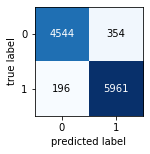

In [39]:
#isualizing Confusion Matrics
from mlxtend.plotting import plot_confusion_matrix
binary2 = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary2, figsize=(2, 2))
plt.show()

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class

True Positive (TP) : Observation is positive, and is 4544 predicted to be positive.

False Negative (FN) : Observation is positive, but is 354 predicted negative. 

True Negative (TN) : Observation is negative, and is 196 predicted to be negative.

False Positive (FP) : Observation is negative, but is 5691 predicted positive.

In [35]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y, predictions))
print("Recall:",recall_score(y, predictions))

Precision: 0.9439429928741092
Recall: 0.9681663147636836


Recall :Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN).
    
Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

In [36]:
from sklearn.metrics import f1_score
f1_score(y, predictions)

0.955901218729955

In [37]:
#Model Saving into Pickel file
import pickle


# open a file, where you ant to store the data
file = open('RandomForest_Phishingclassifier.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest, file)
